In [3]:
import tensorflow 
import numpy as np 
import pandas as pd 
from collections import Counter
import random
import IPython
from IPython.display import Image, Audio
import music21
from music21 import *
import matplotlib.pyplot as plt 
from sklearn.model_selection import train_test_split
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, Dense, Dropout
import tensorflow.keras.backend as K
from tensorflow.keras.optimizers import Adamax
import seaborn as sns
import matplotlib.pyplot as plt
import matplotlib.patches as mpatches
%matplotlib inline
import sys
import warnings
warnings.filterwarnings("ignore")
warnings.simplefilter("ignore")
np.random.seed(42)

In [4]:
#Helping function        
def extract_notes(file):
    notes = []
    pick = None
    for j in file:
        songs = instrument.partitionByInstrument(j)
        for part in songs.parts:
            pick = part.recurse()
            for element in pick:
                if isinstance(element, note.Note):
                    notes.append(str(element.pitch))
                elif isinstance(element, chord.Chord):
                    notes.append(".".join(str(n) for n in element.normalOrder))

    return notes
#Getting the list of notes as Corpus
Corpus= extract_notes(all_midis)
print("Total notes in all the Chopin midis in the dataset:", len(Corpus))

Total notes in all the Chopin midis in the dataset: 57887


In [5]:
print("First fifty values in the Corpus:", Corpus[:50])

First fifty values in the Corpus: ['6.10.1', 'F#2', 'F3', 'G#3', 'F#3', 'B-3', 'C#3', '6.10.1', 'F#2', 'F3', 'G#3', 'F#3', 'B-3', 'C#3', '6.10.1', 'F#2', 'F3', 'G#3', 'F#3', 'B-3', 'C#3', 'F4', 'B4', 'C#2', 'G3', 'B-3', 'G#3', 'G#4', 'B3', 'C#3', '6.10.1', 'F#2', 'F3', 'G#3', 'F#3', 'B-3', 'C#3', 'C#4', '6.10', 'F#2', 'F3', 'G#3', 'F#3', '6.10', 'B-3', 'C#3', 'C#4', '6.10', 'F#2', 'F3']


In [8]:
#Creating a count dictionary
count_num = Counter(Corpus)
print("Total unique notes in the Corpus:", len(count_num))

Total unique notes in the Corpus: 397


In [9]:

Notes = list(count_num.keys())
Recurrence = list(count_num.values())

def Average(lst):
    return sum(lst) / len(lst)
print("Average recurrenc for a note in Corpus:", Average(Recurrence))
print("Most frequent note in Corpus appeared:", max(Recurrence), "times")
print("Least frequent note in Corpus appeared:", min(Recurrence), "time")

Average recurrenc for a note in Corpus: 145.8110831234257
Most frequent note in Corpus appeared: 1627 times
Least frequent note in Corpus appeared: 1 time


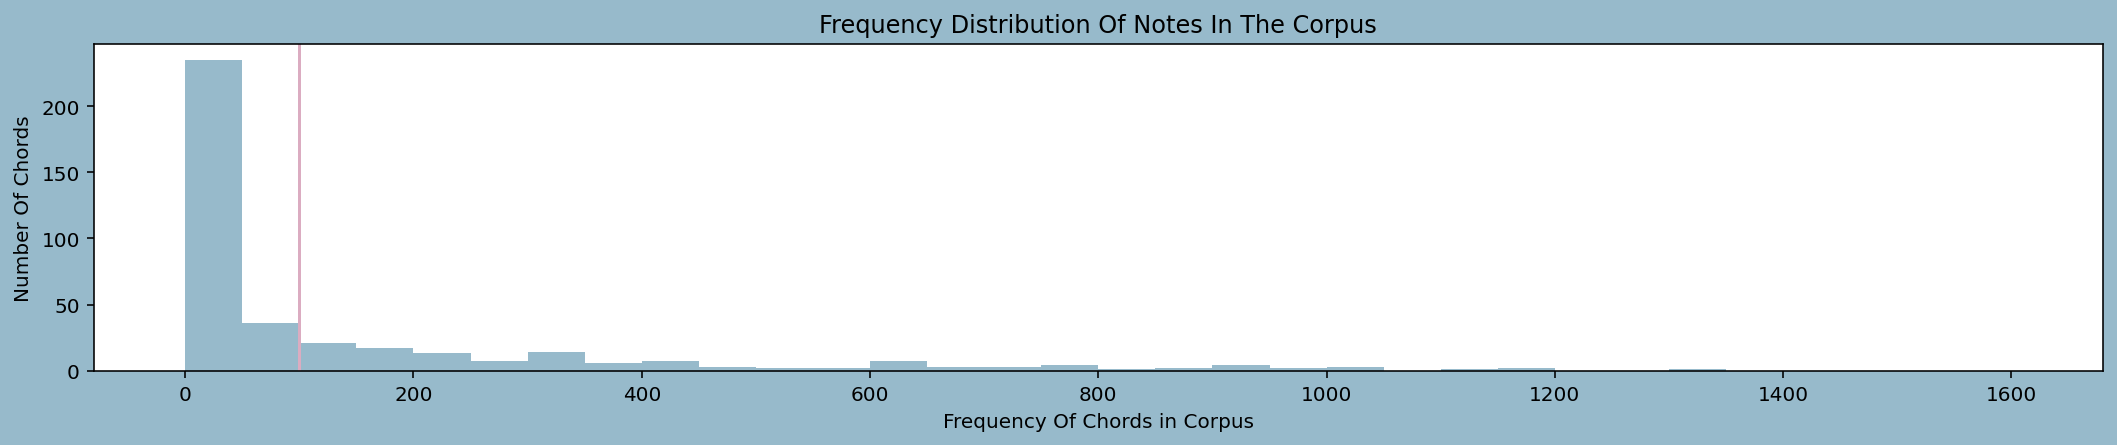

In [10]:
plt.figure(figsize=(18,3),facecolor="#97BACB")
bins = np.arange(0,(max(Recurrence)), 50) 
plt.hist(Recurrence, bins=bins, color="#97BACB")
plt.axvline(x=100,color="#DBACC1")
plt.title("Frequency Distribution Of Notes In The Corpus")
plt.xlabel("Frequency Of Chords in Corpus")
plt.ylabel("Number Of Chords")
plt.show()

In [11]:

rare_note = []
for index, (key, value) in enumerate(count_num.items()):
    if value < 100:
        m =  key
        rare_note.append(m)
        
print("Total number of notes that occur less than 100 times:", len(rare_note))

Total number of notes that occur less than 100 times: 271


In [12]:

for element in Corpus:
    if element in rare_note:
        Corpus.remove(element)

print("Length of Corpus after elemination the rare notes:", len(Corpus))

Length of Corpus after elemination the rare notes: 53712


In [13]:

symb = sorted(list(set(Corpus)))

L_corpus = len(Corpus) 
L_symb = len(symb) 

mapping = dict((c, i) for i, c in enumerate(symb))
reverse_mapping = dict((i, c) for i, c in enumerate(symb))

print("Total number of characters:", L_corpus)
print("Number of unique characters:", L_symb)

Total number of characters: 53712
Number of unique characters: 266


In [14]:

length = 40
features = []
targets = []
for i in range(0, L_corpus - length, 1):
    feature = Corpus[i:i + length]
    target = Corpus[i + length]
    features.append([mapping[j] for j in feature])
    targets.append(mapping[target])
    
    
L_datapoints = len(targets)
print("Total number of sequences in the Corpus:", L_datapoints)

Total number of sequences in the Corpus: 53672


In [15]:
# reshape X and normalize
X = (np.reshape(features, (L_datapoints, length, 1)))/ float(L_symb)
# one hot encode the output variable
y = tensorflow.keras.utils.to_categorical(targets) 

In [16]:
X_train, X_seed, y_train, y_seed = train_test_split(X, y, test_size=0.2, random_state=42)

In [20]:
model = Sequential()
#Adding layers
model.add(LSTM(512, input_shape=(X.shape[1], X.shape[2]), return_sequences=True))
model.add(Dropout(0.1))
model.add(LSTM(256))
model.add(Dense(256))
model.add(Dropout(0.1))
model.add(Dense(y.shape[1], activation='softmax'))
#Compiling the model for training  
opt = Adamax(learning_rate=0.01)
model.compile(loss='categorical_crossentropy', optimizer=opt, metrics=['accuracy'])


In [21]:
#Model's Summary               
model.summary()

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
lstm_2 (LSTM)                (None, 40, 512)           1052672   
_________________________________________________________________
dropout_2 (Dropout)          (None, 40, 512)           0         
_________________________________________________________________
lstm_3 (LSTM)                (None, 256)               787456    
_________________________________________________________________
dense_2 (Dense)              (None, 256)               65792     
_________________________________________________________________
dropout_3 (Dropout)          (None, 256)               0         
_________________________________________________________________
dense_3 (Dense)              (None, 266)               68362     
Total params: 1,974,282
Trainable params: 1,974,282
Non-trainable params: 0
____________________________________________

In [23]:
#Training the Model
history = model.fit(X_train, y_train, batch_size=256, epochs=500)

Epoch 1/500
168/168 [==============================] - 5s 30ms/step - loss: 4.4050 - accuracy: 0.0402
Epoch 2/500
168/168 [==============================] - 5s 30ms/step - loss: 4.3939 - accuracy: 0.0408
Epoch 3/500
168/168 [==============================] - 5s 30ms/step - loss: 4.3830 - accuracy: 0.0422
Epoch 4/500
168/168 [==============================] - 5s 29ms/step - loss: 4.3727 - accuracy: 0.0431
Epoch 5/500
168/168 [==============================] - 5s 29ms/step - loss: 4.3581 - accuracy: 0.0442
Epoch 6/500
168/168 [==============================] - 5s 29ms/step - loss: 4.3367 - accuracy: 0.0460
Epoch 7/500
168/168 [==============================] - 5s 29ms/step - loss: 4.3038 - accuracy: 0.0499
Epoch 8/500
168/168 [==============================] - 5s 29ms/step - loss: 4.2508 - accuracy: 0.0559
Epoch 9/500
168/168 [==============================] - 5s 29ms/step - loss: 4.1980 - accuracy: 0.0632
Epoch 10/500
168/168 [==============================] - 5s 30ms/step - loss: 4.137

[Text(0.5, 0, 'Epochs')]

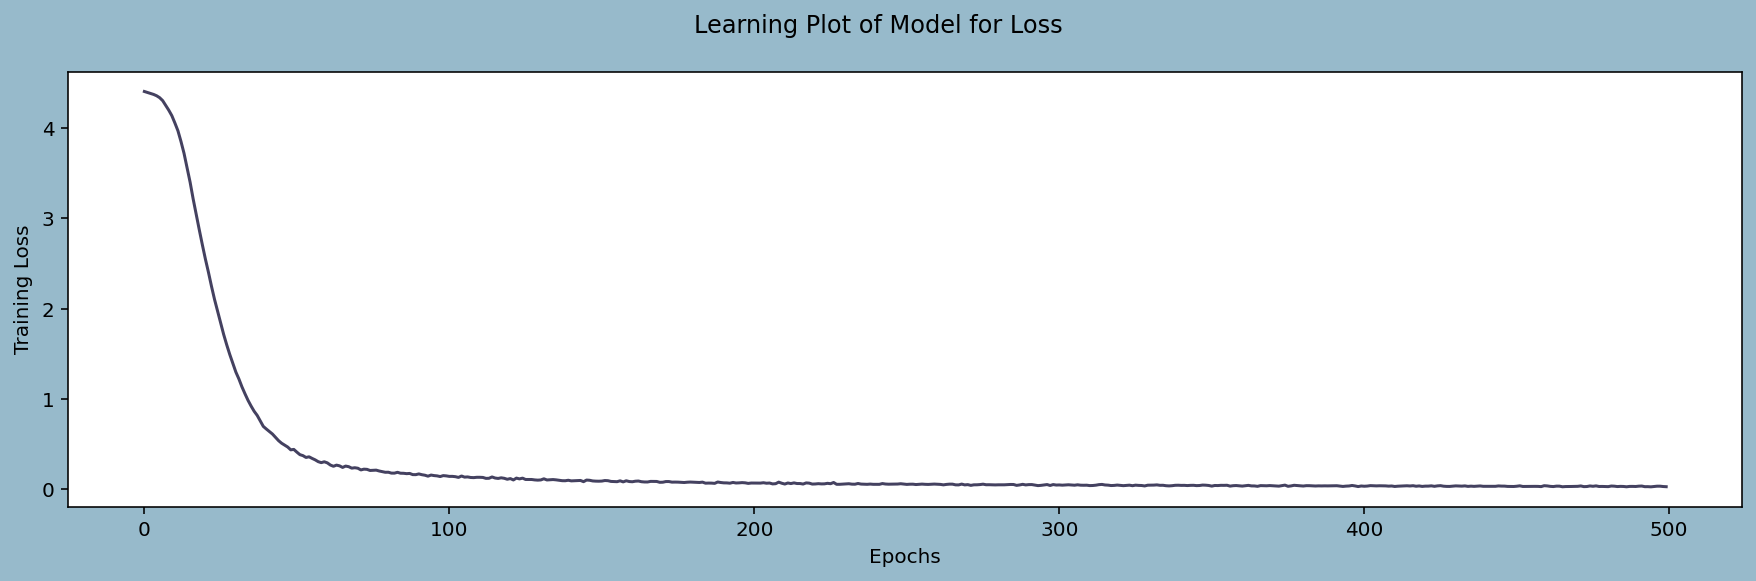

In [24]:
#Plotting the learnings 
history_df = pd.DataFrame(history.history)
fig = plt.figure(figsize=(15,4), facecolor="#97BACB")
fig.suptitle("Learning Plot of Model for Loss")
pl=sns.lineplot(data=history_df["loss"],color="#444160")3
pl.set(ylabel ="Training Loss")
pl.set(xlabel ="Epochs")

In [26]:
model.save('musicgen_model.h5')